In [4]:
#importações 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf
 


In [7]:
#baixando os dados do ativo
#importante procurar qual o ticker de cada ativo do 
ticket = yf.Ticker('PETR4.SA')
df = ticket.history(period='3y', interval='1d')

In [8]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-04-05 00:00:00-03:00,9.481414,9.508919,9.304595,9.446051,40454400,0.0,0.0
2021-04-06 00:00:00-03:00,9.501061,9.575718,9.394970,9.438192,45934300,0.0,0.0
2021-04-07 00:00:00-03:00,9.406758,9.563930,9.402828,9.430333,55892200,0.0,0.0
2021-04-08 00:00:00-03:00,9.422473,9.446050,9.182786,9.312453,63231300,0.0,0.0
2021-04-09 00:00:00-03:00,9.233867,9.343888,9.182787,9.292807,47494400,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-27 00:00:00-03:00,36.279999,36.660000,36.119999,36.549999,19995700,0.0,0.0
2024-03-28 00:00:00-03:00,36.500000,37.520000,36.470001,37.360001,31880800,0.0,0.0
2024-04-01 00:00:00-03:00,37.500000,37.709999,37.209999,37.650002,23697800,0.0,0.0


In [9]:
#Tail mostra os ultimos registros da tabela
df.tail(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-04-01 00:00:00-03:00,37.500000,37.709999,37.209999,37.650002,23697800,0.0,0.0
2024-04-02 00:00:00-03:00,37.820000,38.650002,37.770000,38.619999,45930700,0.0,0.0
2024-04-03 00:00:00-03:00,38.700001,39.009998,38.330002,38.439999,15712100,0.0,0.0


In [22]:
#mostran do qual o tipo de dado com o .info(), referente ao fechamento do ativo
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 748 entries, 2021-04-05 00:00:00-03:00 to 2024-04-03 00:00:00-03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   748 non-null    float64
dtypes: float64(1)
memory usage: 11.7 KB


In [17]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

In [18]:
#por estar trabalhando com um modelo aditivo na decomposição, o resultado disso é a própria serie temporal
decomposicao.seasonal + decomposicao.trend + decomposicao.resid

Date
2021-04-05 00:00:00-03:00     9.446051
2021-04-06 00:00:00-03:00     9.438192
2021-04-07 00:00:00-03:00     9.430333
2021-04-08 00:00:00-03:00     9.312453
2021-04-09 00:00:00-03:00     9.292807
                               ...    
2024-03-27 00:00:00-03:00    36.549999
2024-03-28 00:00:00-03:00    37.360001
2024-04-01 00:00:00-03:00    37.650002
2024-04-02 00:00:00-03:00    38.619999
2024-04-03 00:00:00-03:00    38.439999
Length: 748, dtype: float64

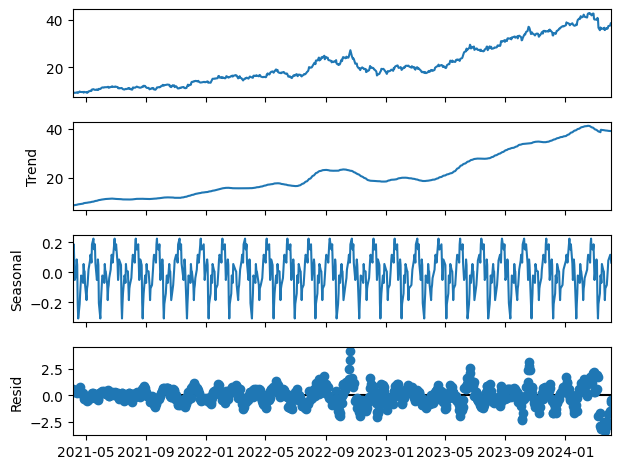

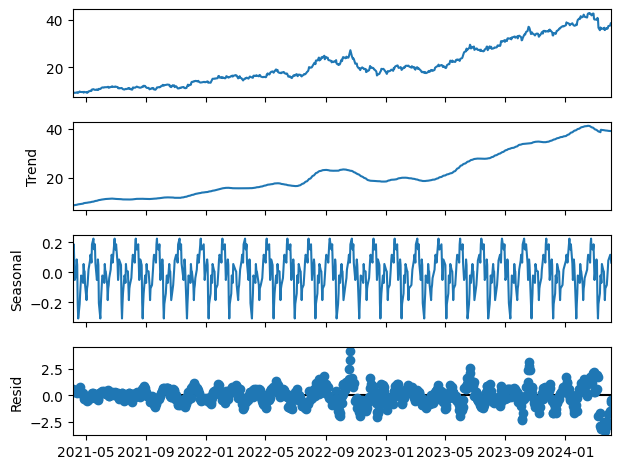

In [19]:
decomposicao.plot()

In [21]:
# Rendabilidade é preço atual / preço anterior * 100 - 100
df[['Close']]

,Close
Date,
2021-04-05 00:00:00-03:00,9.446051
2021-04-06 00:00:00-03:00,9.438192
2021-04-07 00:00:00-03:00,9.430333
2021-04-08 00:00:00-03:00,9.312453
2021-04-09 00:00:00-03:00,9.292807
...,...
2024-03-27 00:00:00-03:00,36.549999
2024-03-28 00:00:00-03:00,37.360001
2024-04-01 00:00:00-03:00,37.650002


In [25]:
df['Close'].shift()

Date
2021-04-05 00:00:00-03:00          NaN
2021-04-06 00:00:00-03:00     9.446051
2021-04-07 00:00:00-03:00     9.438192
2021-04-08 00:00:00-03:00     9.430333
2021-04-09 00:00:00-03:00     9.312453
                               ...    
2024-03-27 00:00:00-03:00    36.259998
2024-03-28 00:00:00-03:00    36.549999
2024-04-01 00:00:00-03:00    37.360001
2024-04-02 00:00:00-03:00    37.650002
2024-04-03 00:00:00-03:00    38.619999
Name: Close, Length: 748, dtype: float64

In [26]:
# Rendabilidade é preço atual / preço anterior * 100 - 100
df['rentabilidade'] = df['Close'] / df['Close'].shift() * 100 - 100

In [27]:
df['rentabilidade']

Date
2021-04-05 00:00:00-03:00         NaN
2021-04-06 00:00:00-03:00   -0.083191
2021-04-07 00:00:00-03:00   -0.083271
2021-04-08 00:00:00-03:00   -1.250007
2021-04-09 00:00:00-03:00   -0.210972
                               ...   
2024-03-27 00:00:00-03:00    0.799782
2024-03-28 00:00:00-03:00    2.216146
2024-04-01 00:00:00-03:00    0.776234
2024-04-02 00:00:00-03:00    2.576354
2024-04-03 00:00:00-03:00   -0.466081
Name: rentabilidade, Length: 748, dtype: float64

In [38]:
def dadosPorPeriodo(df):
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['rentabilidade'] = df['Close'] / df['Close'].shift() * 100 - 100

In [39]:
#resetando o que está passando 
df.reset_index(inplace=True)

In [41]:
dadosPorPeriodo(df)

In [42]:
df.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,rentabilidade,year,month,day
0,0,2021-04-05 00:00:00-03:00,9.481414,9.508919,9.304595,9.446051,40454400,0.0,0.0,NaN,2021,4,5
1,1,2021-04-06 00:00:00-03:00,9.501061,9.575718,9.394970,9.438192,45934300,0.0,0.0,-0.083191,2021,4,6
2,2,2021-04-07 00:00:00-03:00,9.406758,9.563930,9.402828,9.430333,55892200,0.0,0.0,-0.083271,2021,4,7
3,3,2021-04-08 00:00:00-03:00,9.422473,9.446050,9.182786,9.312453,63231300,0.0,0.0,-1.250007,2021,4,8
4,4,2021-04-09 00:00:00-03:00,9.233867,9.343888,9.182787,9.292807,47494400,0.0,0.0,-0.210972,2021,4,9


<Axes: xlabel='month'>

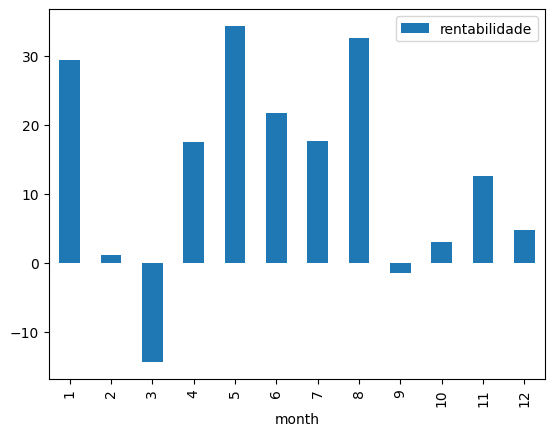

In [43]:
df.groupby('month').agg({'rentabilidade': 'sum'}).plot(kind='bar')

In [44]:
df.set_index('Date', inplace=True)

In [46]:
media_movel30d = df['Close'].rolling(window=30).mean()
media_movel90d = df['Close'].rolling(window=90).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df['Close'])

SyntaxError: incomplete input (91678841.py, line 3)